# Optimization
## Homework 3

In [1]:
import numpy as np
import gurobipy as gp

### Problem 1

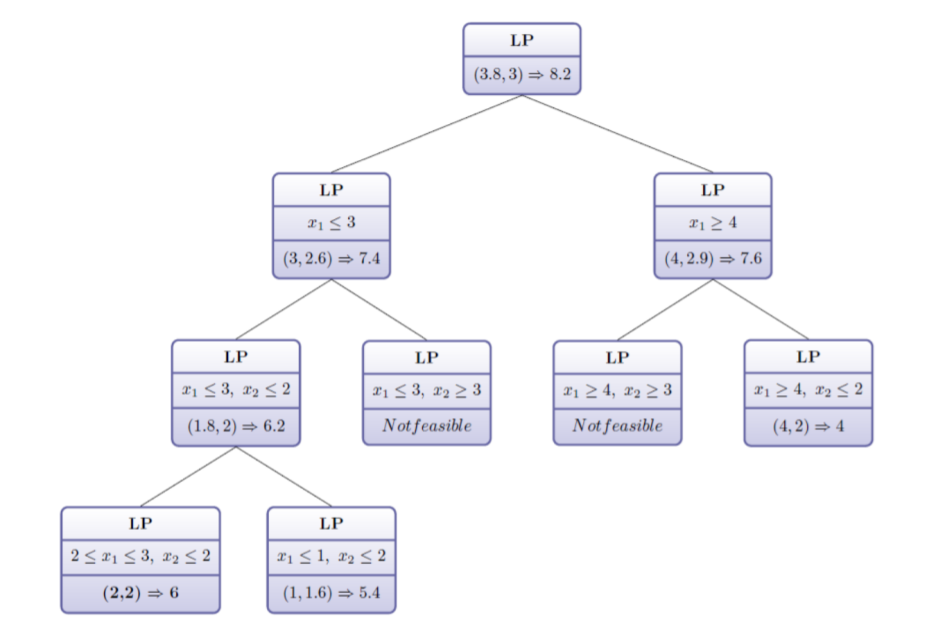

In [2]:
#Check solution by solving IP through gurobi
#Define IP Matrices
obj = np.array([-1,4])
A = np.array([[-10,20],[5,10]])
b = np.array([22,49])

#Set-up IP in gurobipy
m = gp.Model()
mX = m.addMVar(2,vtype=['I','I'],ub=np.array([5,1000]))
mCons = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(2)) <= b[i]) for i in range(2))
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(2)), sense = gp.GRB.MAXIMIZE)
m.Params.OutputFlag = 0

#Solve the IP using gurobi 
m.optimize()

#Print value of decision variables 
print("x\u2081 x\u2082")
print(mX.x)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-09-11
x₁ x₂
[2. 2.]


### Problem 2

Let $x_1, x_2, x_3$ and $x_4$ be the binary variables of building the facorty in Austin, the factory in Dallas, the warehouse in Austin and the warehouse in Dallas separately. 1 indicates that it will be built. 0 indicates not. 

Because the total capital available is 11M, we have constraint $6x_1+3x_2+5x_3+2x_4\le 11$

Because at most one of the two warehouses can be built, we have a constraint $x_3+x_4\le 1$

Because at least one of the two factories should be built, we have a constraint $x_1+x_2\ge 1$

Our object is to maximize the total expected profit, which is $9x_1+5x_2+6x_3+4x_4$.

As a result, the formulation is 
\begin{align}
&\textrm{max} && 9x_1+5x_2+6x_3+4x_4\\
&\textrm{Subject to} && 6x_1+3x_2+5x_3+2x_4\le 11\\
& &&x_3+x_4\le 1\\
& &&x_1+x_2\ge 1,
\end{align}
where $x_i$ are binary.

In [3]:
#Define IP Matrices
obj = np.array([9,5,6,4])
A = np.array([[6,3,5,2],[0,0,1,1],[1,1,0,0]])
b = np.array([11,1,1])

#Set-up IP in gurobipy
m = gp.Model()
mX = m.addMVar(4,vtype=['B','B','B','B'])
mCons1 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(4)) <= b[i]) for i in [0,1])
mCons2 = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(4)) >= b[i]) for i in [2])
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(4)), sense = gp.GRB.MAXIMIZE)
m.Params.OutputFlag = 0

#Solve the IP using gurobi 
m.optimize()

#Print value of decision variables 
print("x\u2081 x\u2082 x\u2083 x\u2084")
print(mX.x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
x₁ x₂ x₃ x₄
[1. 1. 0. 1.]


### Problem 3

1) Assume the ith city is a city whose name is the ith of an increasing alphabet order. Let $x_i$ be the binary variables of building a hub in the ith city.

Because every city needs to be covered, the constraint, $\sum_{j=1}^{12}a_{ij}x_j\ge1$, holds for every city i. Here the element $a_{ij}$ is from the $A$ matrix which is given in the code.

Our objective is to minimize the number of hubs which is $\sum_{i=1}^{12}x_i$.

As a result, the formulation is 
\begin{align}
&\textrm{min} && \sum_{i=1}^{12}x_i\\
&\textrm{Subject to} && \sum_{j=1}^{12}a_{ij}x_j\ge1\hspace{1mm}\forall\hspace{1mm}i\in 1:12
\end{align}

where $x_i$ are binary.

In [4]:
#Define IP Matrices
obj = np.array([1,1,1,1,1,1,1,1,1,1,1,1])
A = np.array([[1,0,1,0,1,0,1,1,1,0,0,0],[0,1,0,0,0,0,0,1,1,0,0,0],[1,0,1,0,0,0,1,1,1,0,0,0],[0,0,0,1,0,0,0,0,0,1,0,0],
             [1,0,0,0,1,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,1,1,0],[1,0,1,0,1,0,1,0,0,0,0,0],[1,1,1,0,0,0,0,1,1,0,0,0],
             [1,1,1,0,0,0,0,1,1,0,0,0],[0,0,0,1,0,1,0,0,0,1,1,1],[0,0,0,0,0,1,0,0,0,1,1,1],[0,0,0,0,0,0,0,0,0,1,1,1]])
b = np.array([1,1,1,1,1,1,1,1,1,1,1,1])

#Set-up IP in gurobipy
m = gp.Model()
mX = m.addMVar(len(obj),vtype=['B']*len(obj))
mCons = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(len(obj))) >= b[i]) for i in range(len(b)))
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(len(obj))), sense = gp.GRB.MINIMIZE)
m.Params.OutputFlag = 0

#Solve the IP using gurobi 
m.optimize()

#Print value of decision variables 
print("x\u2081 x\u2082 x\u2083 x\u2084 x\u2085 x\u2086 x\u2087 x\u2088 x\u2089 x\u2081\u2080 x\u2081\u2081 x\u2081\u2082")
print(mX.x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


x₁ x₂ x₃ x₄ x₅ x₆ x₇ x₈ x₉ x₁₀ x₁₁ x₁₂
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]


### Problem 4

1) Because there is no cost of cutting, we will cut as many pieces as possible from an original roll. In other words, we won't cut only one 25-inch roll because another 25-inch roll can be also cut.

The table below shows all the exhaustive ways of cutting.

| No.of Method | 25 |37 | 54 | Waste|
|   ---        | ---|---|--- | |
| 1            |  4 |  0 | 0   | 20 |
| 2            |  3 |  1 | 0   | 8 |
| 3            |  2 |  0 | 1   | 16 |
| 4            |  1 |  2 | 0   | 21 |
| 5            |  1 |  1 | 1   | 4 |
| 6            |  0 |  3 | 0   | 9 |
| 7            |  0 |  0 | 2   | 12 |


Let $x_i$ be the number of the 120-inch rolls being cut in the ith method. To satisfy the demands, we have the following constraints.

\begin{align}
4x_1+3x_2+2x_3+x_4+x_5 &\ge 233\\
x_2+2x_4+x_5+3x_6 &\ge 148\\
x_3+x_5+2x_7 &\ge 106
\end{align}

Our objective is to minimize the waste. Mathematically speaking, $20x_1+8x_2+16x_3+21x_4+4x_5+9x_6+12x_7$.

As a result, the formulation is 

\begin{align}
& \textrm{min} && 20x_1+8x_2+16x_3+21x_4+4x_5+9x_6+12x_7\\
&\textrm{Subject to} && 4x_1+3x_2+2x_3+x_4+x_5 \ge 233\\
& && x_2+2x_4+x_5+3x_6 \ge 148\\
& && x_3+x_5+2x_7 \ge 106
\end{align}

where $x_i$ are non-negative integers.

In [5]:
#Define IP Matrices
obj = np.array([20,8,16,21,4,9,12])
A = np.array([[4,3,2,1,1,0,0],[0,1,0,2,1,3,0],[0,0,1,0,1,0,2]])
b = np.array([233,148,106])

#Set-up IP in gurobipy
m = gp.Model()
mX = m.addMVar(len(obj),vtype=['I']*len(obj),lb=np.array([0,0,0,0,0,0,0]))
mCons = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(len(obj))) >= b[i]) for i in range(3))
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(len(obj))), sense = gp.GRB.MINIMIZE)
m.Params.OutputFlag = 0


#Solve the IP using gurobi 
m.optimize()

#Print value of decision variables 
print("   x\u2081  x\u2082    x\u2083   x\u2084  x\u2085    x\u2086  x\u2087")
print(mX.x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


   x₁  x₂    x₃   x₄  x₅    x₆  x₇
[ -0.  42.  -0.  -0. 107.  -0.  -0.]


The optimal solution is as following.

| No.of Method | 25 |37 | 54 | #Items|
|   ---        | ---|---|--- | |
| 1            |  4 |  0 | 0   | 0 |
| 2            |  3 |  1 | 0   | 42 |
| 3            |  2 |  0 | 1   | 0 |
| 4            |  1 |  2 | 0   | 0 |
| 5            |  1 |  1 | 1   | 107 |
| 6            |  0 |  3 | 0   | 0 |
| 7            |  0 |  0 | 2   | 0 |


### Problem 5

1) First calculate the costs for different patterns.


| No.of Pattern | Working Days |Cost|
|   ---        | ---|---|
| 1            |  Sunday-Thursday |  330 |
| 2            |  Monday-Friday |  300 | 
| 3            |  Tuesday-Saturday |  330 | 
| 4            |  Wednesday-Sunday |  360 |
| 5            |  Thursday-Monday |  360 | 
| 6            |  Friday-Tuesday |  360 | 
| 7            |  Saturday-Wednesday |  360 | 


Let $x_i$ be the number of workers hired in the ith pattern. The objective should be minimize the costs which is $330x_1+300x_2+330x_3+360x_4+360x_5+360x_6+360x_7$.

In order to satisfy the demands on each day, the following constraints should be satisfied.

\begin{align}
&Sunday:    &&x_1+x_4+x_5+x_6+x_7\ge 5\\
&Monday:    &&x_1+x_2+x_5+x_6+x_7\ge 13\\
&Tuesday:   &&x_1+x_2+x_3+x_6+x_7\ge 12\\
&Wednesday: &&x_1+x_2+x_3+x_4+x_7\ge 10\\
&Thursday:  &&x_1+x_2+x_3+x_4+x_5\ge 14\\
&Friday:    &&x_2+x_3+x_4+x_5+x_6\ge 8\\
&Saturday:  &&x_3+x_4+x_5+x_6+x_7\ge 6\\
\end{align}

As a result, the formulation is 

\begin{align}
&\textrm{min} && 330x_1+300x_2+330x_3+360x_4+360x_5+360x_6+360x_7\\
&\textrm{Subject to} && x_1+x_4+x_5+x_6+x_7\ge 5\\
&   &&x_1+x_2+x_5+x_6+x_7\ge 13\\
&  &&x_1+x_2+x_3+x_6+x_7\ge 12\\
& &&x_1+x_2+x_3+x_4+x_7\ge 10\\
&  &&x_1+x_2+x_3+x_4+x_5\ge 14\\
&    &&x_2+x_3+x_4+x_5+x_6\ge 8\\
&  &&x_3+x_4+x_5+x_6+x_7\ge 6\\
\end{align}

where $x_i$ are non-negative integers.


In [6]:
#Define IP Matrices
obj = np.array([330,300,330,360,360,360,360])
A = np.array([[1,0,0,1,1,1,1],[1,1,0,0,1,1,1],[1,1,1,0,0,1,1],[1,1,1,1,0,0,1],[1,1,1,1,1,0,0],[0,1,1,1,1,1,0],[0,0,1,1,1,1,1]])
b = np.array([5,13,12,10,14,8,6])

#Set-up IP in gurobipy
m = gp.Model()
mX = m.addMVar(len(obj),vtype=['I']*len(obj),lb=np.array([0,0,0,0,0,0,0]))
mCons = m.addConstrs((gp.quicksum(mX[j]*A[i,j] for j in range(len(obj))) >= b[i]) for i in range(len(b)))
m.setObjective(gp.quicksum(obj[j]*mX[j] for j in range(len(obj))), sense = gp.GRB.MINIMIZE)
m.Params.OutputFlag = 0


#Solve the IP using gurobi 
m.optimize()

#Print value of decision variables 
print(" x\u2081   x\u2082  x\u2083  x\u2084  x\u2085  x\u2086  x\u2087")
print(mX.x)

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
 x₁   x₂  x₃  x₄  x₅  x₆  x₇
[ 1.  8.  2. -0.  3.  1. -0.]
